In [ ]:
import torch
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
torch.set_default_device('cuda')

In [ ]:
def create_y(X,beta):
  y = (X @ beta).sigmoid()
  y += torch.randn_like(y)
  return y

def create_X(n_samples, n_features):
  return torch.randn(n_samples, n_features)

def sigma(x):
  return x.relu() #- 1/np.sqrt(2*np.pi)

def dsigma(x):
  return (x > 0).float()

def get_G(a, W, X, y, sigma, dsigma):
  return X.T @ ((y - sigma(X @ W) @ a) @ a.T * dsigma(X @ W))

def get_G2(a, W, X, y, sigma, dsigma,N):
  return X.T @ ((y - sigma(X @ W)/np.sqrt(N) @ a) @ a.T * dsigma(X @ W))

def opnorm(G):
  return torch.linalg.svdvals(G).max()

In [ ]:
n = 750
d = 1000
N = 1250

a = torch.randn(N,1)/np.sqrt(N)
W = torch.randn(d,N)/np.sqrt(d)
beta = torch.randn(d,1)/np.sqrt(d)

X = create_X(n,d)
y = create_y(X,beta)

In [ ]:
G = get_G(a,W,X,y,sigma,dsigma)/n

In [ ]:
opnorm(G)

tensor(0.7792, device='cuda:0')

In [ ]:
def create_curve(ns,T):
  norms = torch.zeros(len(ns))
  fnorms = torch.zeros(len(ns))

  prod = torch.zeros(len(ns))
  prod2 = torch.zeros(len(ns))
  prod3 = torch.zeros(len(ns))

  fprod = torch.zeros(len(ns))
  fprod2 = torch.zeros(len(ns))
  fprod3 = torch.zeros(len(ns))
  fprod4 = torch.zeros(len(ns))
  for i,n in enumerate(ns):
    d = n//2
    N = n//3
    beta = torch.randn(d,1)/np.sqrt(d)
    for t in tqdm(range(T)):
      a = torch.randn(N,1)/np.sqrt(N)
      W = torch.randn(d,N)/np.sqrt(d)

      X = create_X(n,d)
      y = create_y(X,beta)

      G = get_G(a,W,X,y,sigma,dsigma)/n
      G2 = get_G2(a,W,X,y,sigma,dsigma,N)/n

      u, s, v = torch.linalg.svd(G)
      u2, s2, v2 = torch.linalg.svd(G2)

      u1 = u[:,0]
      u2 = u2[:,0]

      norms[i] += opnorm(G)/T
      fnorms[i] += opnorm(G2)/T

      d1 = (X.T @ y).flatten()
      d2 = (X.T @ ((y - sigma(X @ W) @ a))).flatten()
      d3 = beta.flatten()
      d4 = (X.T @ ((y - sigma(X @ W)/np.sqrt(N) @ a))).flatten()


      prod[i] += (d1 * u1).sum().abs()/(torch.norm(d1.flatten())*torch.norm(u1)*T)
      prod2[i] += (d2 * u1).sum().abs()/(torch.norm(d2.flatten())*torch.norm(u1)*T)
      prod3[i] += (d3 * u1).sum().abs()/(torch.norm(d3.flatten())*torch.norm(u1)*T)


      fprod[i] += (d1 * u2).sum().abs()/(torch.norm(d1.flatten())*torch.norm(u2)*T)
      fprod2[i] += (d4 * u2).sum().abs()/(torch.norm(d4.flatten())*torch.norm(u2)*T)
      fprod3[i] += (d3 * u2).sum().abs()/(torch.norm(d3.flatten())*torch.norm(u2)*T)

    print(norms[i], fnorms[i], prod[i], prod2[i], fprod[i], fprod2[i])
  return norms, fnorms, prod, prod2, prod3, fprod, fprod2, fprod3


In [ ]:
ns = [100,200,300,400,500,600,700,800]
T = 500
norms, fnorms, prod, prod2, prod3, fprod, fprod2, fprod3 = create_curve(ns,T)

  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5990, device='cuda:0') tensor(0.4503, device='cuda:0') tensor(0.7091, device='cuda:0') tensor(0.9604, device='cuda:0') tensor(0.9333, device='cuda:0') tensor(0.9456, device='cuda:0')


  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5645, device='cuda:0') tensor(0.4276, device='cuda:0') tensor(0.7289, device='cuda:0') tensor(0.9788, device='cuda:0') tensor(0.9668, device='cuda:0') tensor(0.9726, device='cuda:0')


  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5592, device='cuda:0') tensor(0.4237, device='cuda:0') tensor(0.7438, device='cuda:0') tensor(0.9857, device='cuda:0') tensor(0.9780, device='cuda:0') tensor(0.9817, device='cuda:0')


  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5558, device='cuda:0') tensor(0.4215, device='cuda:0') tensor(0.7394, device='cuda:0') tensor(0.9893, device='cuda:0') tensor(0.9836, device='cuda:0') tensor(0.9865, device='cuda:0')


  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5533, device='cuda:0') tensor(0.4216, device='cuda:0') tensor(0.7493, device='cuda:0') tensor(0.9914, device='cuda:0') tensor(0.9872, device='cuda:0') tensor(0.9892, device='cuda:0')


  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5520, device='cuda:0') tensor(0.4203, device='cuda:0') tensor(0.7445, device='cuda:0') tensor(0.9931, device='cuda:0') tensor(0.9893, device='cuda:0') tensor(0.9911, device='cuda:0')


  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5520, device='cuda:0') tensor(0.4216, device='cuda:0') tensor(0.7498, device='cuda:0') tensor(0.9939, device='cuda:0') tensor(0.9908, device='cuda:0') tensor(0.9924, device='cuda:0')


  0%|          | 0/500 [00:00<?, ?it/s]

tensor(0.5538, device='cuda:0') tensor(0.4187, device='cuda:0') tensor(0.7518, device='cuda:0') tensor(0.9946, device='cuda:0') tensor(0.9919, device='cuda:0') tensor(0.9933, device='cuda:0')


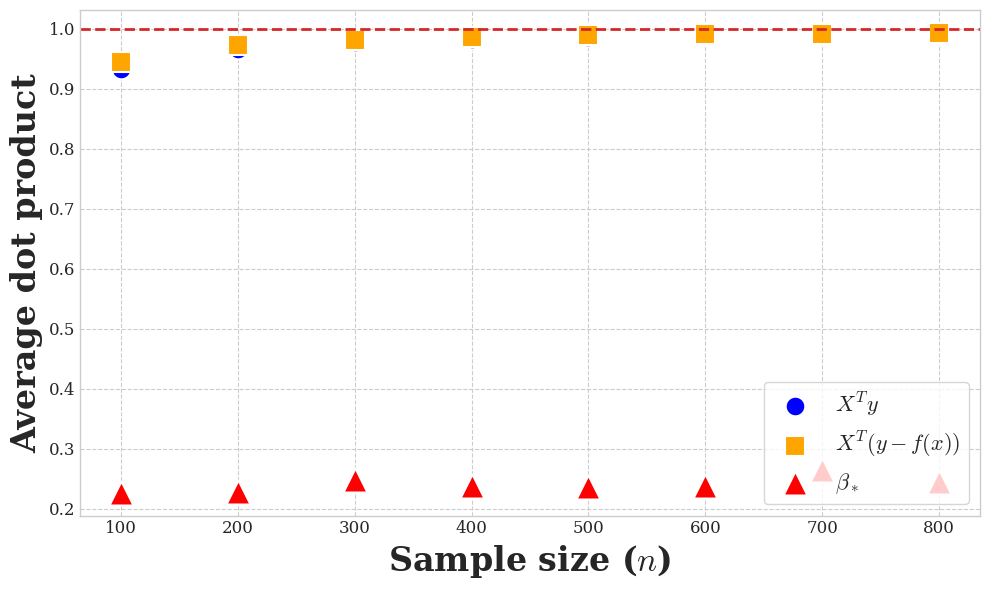

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Set style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'

# Assuming ns, prod, and prod2 are your data
# For demonstration, I'll create sample data
np.random.seed(42)
# ns = np.arange(10, 1000, 100)
# prod = 1 + 0.2 * np.random.randn(len(ns)) * np.sqrt(1/np.log(ns))
# prod2 = 0.2 * np.random.randn(len(ns)) * np.sqrt(1/np.log(ns))

# Create figure with appropriate size
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Plot data with improved markers and colors
ax.scatter(ns, fprod.cpu(), s=200, color='blue', marker='o', edgecolor='white',
           linewidth=1.5, label=r"$X^Ty$")
ax.scatter(ns, fprod2.cpu(), s=200, color='orange', marker='s', edgecolor='white',
           linewidth=1.5, label=r"$X^T(y-f(x))$")
ax.scatter(ns, fprod3.cpu(), s=300, color='red', marker='^', edgecolor='white',
           linewidth=1.5, label=r"$\beta_*$")

# Add reference line with better styling
ax.axhline(y=1, color='#d62728', linestyle='--', linewidth=2)

# Improve axes scales and labels
# ax.set_xscale('log')  # Log scale often better for scaling plots
ax.set_xlabel("Sample size ($n$)", fontsize=24, fontweight='bold')
ax.set_ylabel("Average dot product", fontsize=24, fontweight='bold')

# ax.set_ylim(bottom = 0., top = 1.1)

# Add informative title with more context
# ax.set_title("NTK Scaling", fontsize=24, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, linestyle='--')

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add annotations to highlight important points
# max_prod_idx = np.argmax(prod)
# ax.annotate(f'Peak: {prod[max_prod_idx]:.2f}',
#             xy=(ns[max_prod_idx], prod[max_prod_idx]),
#             xytext=(ns[max_prod_idx]*1.2, prod[max_prod_idx]*1.05),
#             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
#             fontsize=12)

# Improve legend
ax.legend(fontsize=16, frameon=True, facecolor='white', loc='lower right')

# Add a text box with additional information
# textstr = '\n'.join((
#     r'Model parameters:',
#     r'Feature dimension: $d=100$',
#     r'Learning rate: $\eta=0.01$'))
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=12,
#         verticalalignment='bottom', bbox=props)

# Adjust layout and save with higher quality
plt.tight_layout()
plt.savefig('scaling_plot-mf.png', dpi=100, bbox_inches='tight')

plt.show()